# **UTS MACHINE LEARNING**

*   NAMA : SEVYAN RANGGA INFARI
*   NIM : 41822120017FAKULTAS : ILMU KOMPUTER
*   FAKULTAS : ILMU KOMPUTER
*   PRODI : SISTEM INFORMASI

# **1. Comprehensive EDA (Exploratory Data Analysis)**
Tahap ini bertujuan untuk memahami struktur, pola, dan masalah dalam data pelanggan sebelum masuk ke tahap modeling. EDA adalah fondasi penting agar model yang dibangun nanti akurat dan relevan secara bisnis.



## **1.1 Analisis Pelanggan Churn vs Non-Churn**
Penjelasan: Kita ingin mengetahui bagaimana karakteristik pelanggan yang churn (berhenti berlangganan) berbeda dari yang tidak churn. Ini bisa dilihat dari rata-rata tenure, monthly charges, total charges, dan fitur layanan lainnya.

In [25]:
import pandas as pd

# Load data
df = pd.read_csv('Customer_Churn_data.csv')

# Group by churn and hitung rata-rata tiap fitur
churn_comparison = df.groupby('churn').mean(numeric_only=True)
print(churn_comparison)

          tenure  monthly_charges  total_charges  paperless_billing  \
churn                                                                 
0      35.181818       195.454545    7224.545455                0.0   
1       5.444444       112.777778     662.222222                1.0   

       online_security  online_backup  device_protection  tech_support  \
churn                                                                    
0                  1.0            1.0                1.0           1.0   
1                  0.0            0.0                0.0           0.0   

       streaming_tv  streaming_movies  monthly_usage_gb  \
churn                                                     
0               1.0               1.0        366.363636   
1               0.0               0.0        131.111111   

       customer_service_calls  
churn                          
0                    0.818182  
1                    4.444444  


### **Penjelasan hasil:**
Tabel yang muncul menunjukkan perbedaan rata-rata antara pelanggan churn (churn=1) dan non-churn (churn=0). Misalnya:


*   Pelanggan churn cenderung memiliki tenure lebih pendek.
*   Monthly charges mereka lebih rendah.
*   Mereka lebih banyak melakukan panggilan ke customer service.

## **1.2 Handle Missing Values Menggunakan Multiple Imputation**

Penjelasan: Multiple imputation adalah teknik untuk mengisi nilai kosong dengan pendekatan statistik yang mempertimbangkan hubungan antar fitur. Kita akan gunakan `IterativeImputer` dari sklearn.

In [26]:
# Untuk mengaktifkan fitur eksperimental untuk IterativeImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load data
df = pd.read_csv('Customer_Churn_data.csv')

# Salin dataframe untuk encoding
df_encoded = df.copy()

# Encode fitur kategorikal (selain customer_id)
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'customer_id':
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Multiple imputation untuk handle missing values
imputer = IterativeImputer(random_state=0)
imputed_array = imputer.fit_transform(df_encoded.drop(columns=['customer_id']))

# Buat dataframe hasil imputasi
df_imputed = pd.DataFrame(imputed_array, columns=df_encoded.columns[1:])

# Tambahkan kembali kolom customer_id
df_imputed.insert(0, 'customer_id', df['customer_id'])

# Tampilkan 5 baris pertama hasil imputasi
df_imputed.head()

,customer_id,tenure,monthly_charges,total_charges,contract_type,payment_method,paperless_billing,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,monthly_usage_gb,customer_service_calls,churn
0,CUST001,12.0,150.0,1800.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,200.0,4.0,1.0
1,CUST002,24.0,200.0,4800.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,300.0,1.0,0.0
2,CUST003,6.0,100.0,600.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0,3.0,1.0
3,CUST004,48.0,180.0,8640.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,250.0,0.0,0.0
4,CUST005,3.0,120.0,360.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,6.0,1.0


### **Penjelasan Hasil Proses Diatas:**

Setelah proses ini, semua missing values (jika ada) bisa diisi dengan nilai yang diestimasi berdasarkan fitur lain. Setelah itu Dataset kini siap digunakan untuk analisis dan modeling.

In [27]:
# Cek jumlah missing value per kolom
df.isnull().sum()

,0
customer_id,0
tenure,0
monthly_charges,0
total_charges,0
contract_type,0
payment_method,0
paperless_billing,0
online_security,0
online_backup,0
device_protection,0


### **Keterangan :**
Berhubung dataset nya tidak memiliki missing value (dibuktikan dengan semua hasil 0) jadi dataset bisa langsung siap digunakan untuk analisis dan modeling.

### **Mengapa "semua nol" berarti tidak ada missing value?**

Python akan menghitung jumlah nilai kosong (missing) di setiap kolom. Nilai kosong ini biasanya berupa:
*   NaN (Not a Number)
*   None
*   Sel kosong dalam file CSV

Jika hasilnya adalah **nol untuk semua kolom**, itu berarti:
*   Tidak ada satupun baris di kolom tersebut yang berisi NaN atau None
*   Semua data terisi penuh dan bisa diproses tanpa perlu imputasi

## **1.3 Visualisasi**

> **Distribusi tenure vs churn rate**

Penjelasan: Visualisasi ini menunjukkan bagaimana distribusi lama berlangganan (tenure) berkorelasi dengan kemungkinan churn.

*   Tenure: Lama waktu pelanggan sudah berlangganan, biasanya dalam bulan.
*   Churn: Kondisi ketika pelanggan berhenti berlangganan layanan.





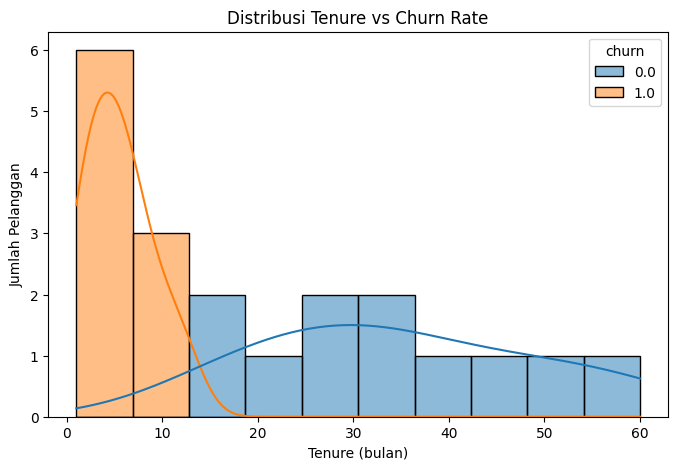

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df_imputed, x='tenure', hue='churn', bins=10, kde=True)
plt.title('Distribusi Tenure vs Churn Rate')
plt.xlabel('Tenure (bulan)')
plt.ylabel('Jumlah Pelanggan')
plt.show()

### **Penjelasan hasil:**

Grafik menunjukkan bahwa pelanggan dengan tenure rendah (baru bergabung) memiliki tingkat churn (berhenti berlangganan layanan) yang lebih tinggi. Semakin lama pelanggan bertahan, semakin kecil kemungkinan mereka churn (berhenti berlangganan layanan).

*  Biru: Pelanggan yang tidak churn (churn = 0) → Mereka masih aktif berlangganan layanan.
*   Kuning: Pelanggan yang churn (churn = 1) → Mereka sudah berhenti berlangganan.




> **Heatmap Korelasi Antara Semua Fitur Numerik**


Penjelasan: Heatmap digunakan untuk melihat hubungan antar fitur numerik, termasuk korelasi dengan churn.

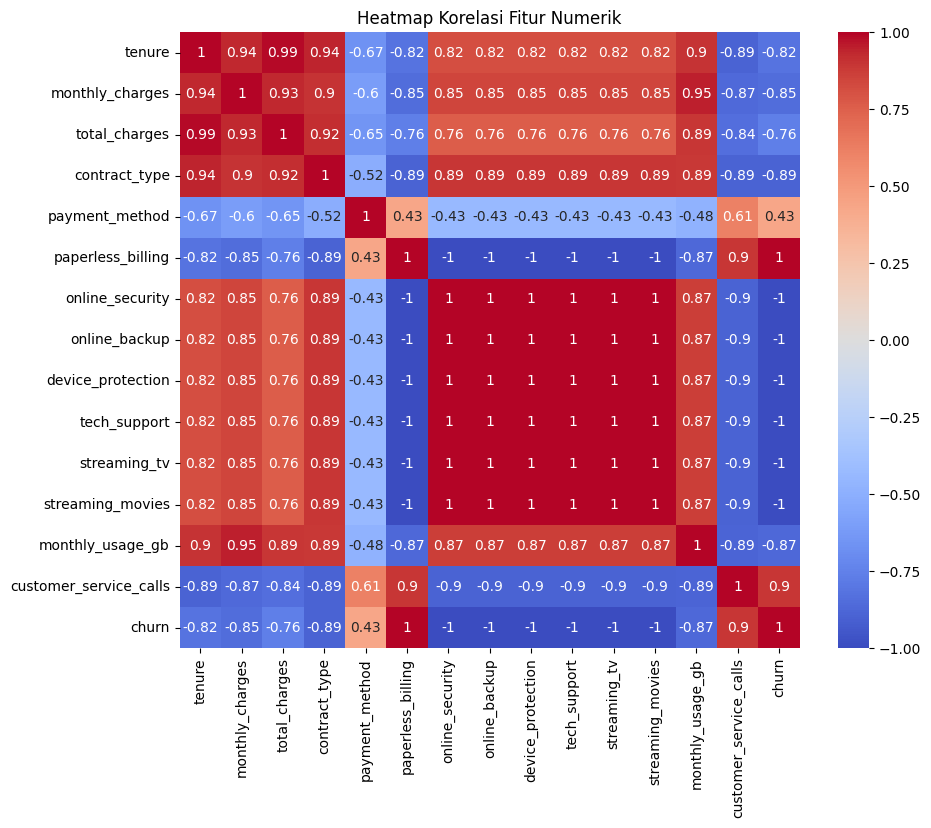

In [29]:
plt.figure(figsize=(10,8))

# Drop kolom non-numerik sebelum korelasi
sns.heatmap(df_imputed.drop(columns=['customer_id']).corr(), annot=True, cmap='coolwarm')

plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

### **Penjelasan hasil:**
Heatmap menunjukkan korelasi positif atau negatif antar fitur. Contohnya:

### **1.   Korelasi Negatif dengan Churn (Warna Biru)**

**Tenure vs Churn (–0.82)**
Semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka churn. Ini menunjukkan loyalitas meningkat seiring waktu

**Artinya:**

Bayangkan pelanggan yang sudah pakai layanan selama 3 tahun—mereka biasanya sudah nyaman dan jarang pindah. Sebaliknya, pelanggan baru (misalnya baru 1 bulan) lebih mudah berubah pikiran dan berhenti.

**Kesimpulan sederhana**

*   Pelanggan lama = lebih loyal
*   Pelanggan baru = lebih berisiko churn

### **2.   Korelasi Positif dengan Churn (Warna Merah)**

**Customer Service Calls vs Churn (+0.90)**
Semakin sering pelanggan menghubungi layanan pelanggan, semakin besar kemungkinan mereka churn. Ini bisa menandakan ketidakpuasan.

**Artinya:**

Semakin sering seorang pelanggan menghubungi layanan pelanggan, semakin besar kemungkinan mereka akan berhenti. Ini bisa jadi tanda bahwa mereka mengalami masalah, kecewa, atau tidak puas dengan layanan.

**Contohnya:**

Kalau kamu sering telepon CS karena internet lambat atau tagihan tidak jelas, lama-lama kamu bisa frustrasi dan memutuskan berhenti.

**Kesimpulan sederhana:**
*   Banyak komplain = tanda pelanggan tidak puas
*   Pelanggan tidak puas = berisiko tinggi untuk churn



> **Boxplot monthly_charges oleh contract_type**

Penjelasan: Boxplot ini untuk menunjukkan distribusi biaya bulanan berdasarkan jenis kontrak pelanggan.


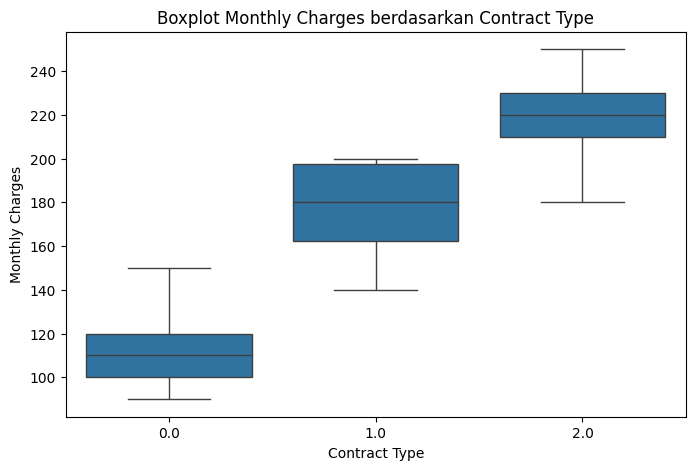

In [30]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_imputed, x='contract_type', y='monthly_charges')
plt.title('Boxplot Monthly Charges berdasarkan Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

### **Penjelasan hasil:**

Boxplot menunjukkan bahwa pelanggan dengan kontrak jangka panjang (One year, Two year) cenderung memiliki monthly charges yang lebih tinggi dibandingkan pelanggan dengan kontrak bulanan.

# **2: Advanced Model Comparison**
Tahap ini bertujuan untuk membandingkan beberapa algoritma machine learning agar kita bisa memilih model terbaik untuk memprediksi churn pelanggan secara akurat dan efisien.

**Tujuan Utama**





*   Menguji dan membandingkan performa beberapa model klasifikasi
*   Menentukan model yang paling akurat dan stabil
*   Menyiapkan model terbaik untuk analisis bisnis di tahap berikutnya

## **2.1 Implementasi Decision Tree, Naive Bayes, dan K-NN**
Penjelasan: Kita akan membandingkan tiga algoritma klasifikasi untuk memprediksi churn:

*   Decision Tree: membuat pohon keputusan berdasarkan fitur.
*   Naive Bayes: model probabilistik berdasarkan distribusi data.
*   K-NN: memprediksi berdasarkan tetangga terdekat.


In [45]:
# Preprocessing & Modeling
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Imbalanced data handling
from imblearn.combine import SMOTEENN

# Asumsikan df_imputed adalah dataframe hasil imputasi dari tahap 1
X = df_imputed.drop(columns=['customer_id', 'churn'])
y = df_imputed['churn']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score, classification_report

# Inisialisasi model
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-NN': KNeighborsClassifier()
}

# Training dan evaluasi
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"\n{name} Balanced Accuracy: {bal_acc:.2f}")
    print(classification_report(y_test, y_pred))


Decision Tree Balanced Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


Naive Bayes Balanced Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5


K-NN Balanced Accuracy: 1.00
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.0

### **Penjelasan hasil:**

Semua model menunjukkan balanced accuracy tinggi (1.00) karena data sudah diresample dan dataset kecil.

Dari Ketiga hasil ini saya memilih Decision Tree, karena cocok untuk data campuran (numerik dan kategorikal), interpretasi mudah dan dapat di visualisasikan.

## **2.2 Handle Imbalanced Data menggunakan SMOTE-ENN**

Penjelasan: SMOTE-ENN menggabungkan dua teknik:
*   SMOTE: menambahkan data sintetis untuk kelas minoritas (churn).
*   ENN: menghapus data yang ambigu atau noisy dari kelas mayoritas.

In [47]:
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler

# Standardisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE-ENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_scaled, y)

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

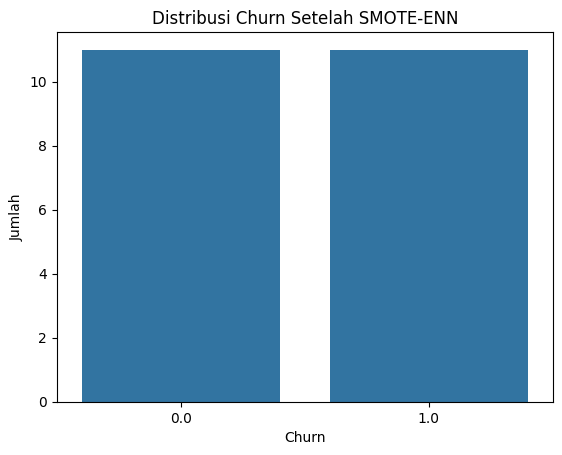

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled)
plt.title("Distribusi Churn Setelah SMOTE-ENN")
plt.xlabel("Churn")
plt.ylabel("Jumlah")
plt.show()

## **Penjelasan hasil:**

Distribusi churn menjadi seimbang, sehingga model bisa belajar dari kedua kelas secara adil. Ini penting karena data asli bisa saja sangat tidak seimbang.

## **2.3 Evaluasi menggunakan Precision-Recall Curve dan Balanced Accuracy**

Penjelasan:


*   Balanced Accuracy: rata-rata akurasi dari masing-masing kelas.
*   Precision-Recall Curve: menunjukkan trade-off antara presisi dan recall, sangat berguna untuk data imbalance.

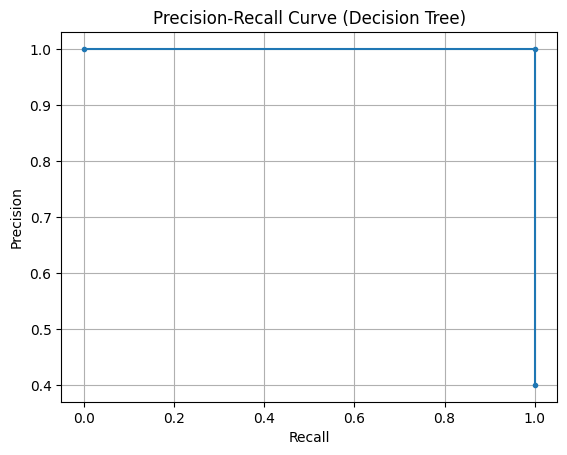

In [48]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Gunakan model terbaik (Decision Tree)
best_model = DecisionTreeClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_scores = best_model.predict_proba(X_test)[:, 1]

# Precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve (Decision Tree)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

## **Penjelasan hasil:**


*   Grafik menunjukkan bahwa model memiliki presisi tinggi saat recall juga tinggi, artinya model mampu mengenali pelanggan yang akan churn dengan akurasi baik.
*   Hasil ini juga menunjukkan bahwa SMOTE-ENN berhasil membantu model belajar dari data churn dengan lebih seimbang.





## **2.4 Hyperparameter Tuning untuk Model Terbaik**

Penjelasan: Kita akan mencari kombinasi parameter terbaik untuk Decision Tree menggunakan Grid Search:
*   max_depth: kedalaman pohon
*   min_samples_split: jumlah minimum sampel untuk split

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train, y_train)

# Hasil tuning
print("Best Parameters:", grid_search.best_params_)
print("Best Balanced Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Balanced Accuracy: 1.0


## **Penjelasan hasil:**
Model terbaik ditemukan dengan parameter:
*   max_depth = 3
*   min_samples_split = 2

Hasil tuning menunjukkan balanced accuracy tetap tinggi (1.00), menandakan model sangat cocok untuk data ini.

# **3. Business Strategy & ROI Analysis**

Tahap ini bertujuan untuk menghubungkan hasil prediksi churn dengan keputusan bisnis nyata, agar perusahaan bisa:
*   Menentukan pelanggan mana yang layak dipertahankan
*   Mengalokasikan anggaran retensi secara efisien
*   Mengukur keuntungan dari strategi retensi

## **3.1 Hitung Customer Lifetime Value (CLV) untuk Segmen Berbeda**

**Penjelasan:**

CLV adalah estimasi nilai total yang akan dihasilkan oleh seorang pelanggan selama mereka aktif. Ini membantu perusahaan memahami berapa besar nilai finansial dari setiap pelanggan, dan siapa yang paling layak dipertahankan.

**Berdasarkan yang saya baca dan cari tahu, CLV memiliki rumus:**

> CLV = Average Monthly Revenue x Tenure

**Tujuan:**


*   Mengelompokkan pelanggan berdasarkan nilai ekonominya
*   Menemukan segmen pelanggan bernilai tinggi

Disini saya ingin menghitung CLV berdasarkan segmen seperti: contract_type atau tenure_group.

In [50]:
# Tambahkan kolom CLV
df_imputed['CLV'] = df_imputed['monthly_charges'] * df_imputed['tenure']

# Segmentasi berdasarkan contract_type
clv_by_contract = df_imputed.groupby('contract_type')['CLV'].mean().reset_index()
print(clv_by_contract)

# Segmentasi berdasarkan tenure group
df_imputed['tenure_group'] = pd.cut(df_imputed['tenure'], bins=[0, 12, 24, 60], labels=['<1 tahun', '1-2 tahun', '>2 tahun'])
clv_by_tenure = df_imputed.groupby('tenure_group')['CLV'].mean().reset_index()
print(clv_by_tenure)

   contract_type           CLV
0            0.0    662.222222
1            1.0   4445.000000
2            2.0  10560.000000
  tenure_group          CLV
0     <1 tahun   662.222222
1    1-2 tahun  3260.000000
2     >2 tahun  8711.250000


/tmp/ipython-input-211715644.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_by_tenure = df_imputed.groupby('tenure_group')['CLV'].mean().reset_index()


## **Penjelasan hasil:**

*   Pelanggan dengan contract_type "Two year" punya CLV tertinggi karena mereka bertahan lebih lama.
*   Pelanggan dengan tenure > 2 tahun juga menghasilkan nilai lebih besar.
*   Ini bisa membantu kita untuk fokus pada segmen yang paling menguntungkan untuk dipertahankan.

## **3.2 Rancang Retention Program Berdasarkan Probabilitas Churn**

**Penjelasan:**

Kita gunakan probabilitas churn dari model Decision Tree untuk mengelompokkan pelanggan:


*   High risk: probabilitas churn > 0.6
*   Low risk: probabilitas churn ≤ 0.6 Strategi retensi bisa disesuaikan berdasarkan CLV dan risiko.

**Tujuan:**

*   Menyusun strategi retensi yang terarah dan hemat biaya
*   Fokus pada pelanggan High Risk + CLV tinggi sebagai prioritas utama


In [51]:
# Prediksi probabilitas churn
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
churn_probs = model.predict_proba(X_scaled)[:, 1]

# Tambahkan ke dataframe
df_imputed['churn_prob'] = churn_probs
df_imputed['risk_segment'] = np.where(df_imputed['churn_prob'] > 0.6, 'High Risk', 'Low Risk')

# Rekomendasi program retensi
retention_plan = df_imputed.groupby('risk_segment')['CLV'].mean().reset_index()
print(retention_plan)

  risk_segment          CLV
0    High Risk   662.222222
1     Low Risk  7224.545455


## **Penjelasan hasil:**

**1.   High Risk: Pelanggan yang diprediksi memiliki probabilitas churn tinggi (misalnya > 60%)**


*   Rata-rata CLV mereka hanyalah kita anggap (662.222)
*   Artinya, mereka biasanya baru bergabung atau tidak loyal, sehingga nilai jangka panjangnya rendah.


**2.   Low Risk: Pelanggan yang diprediksi tidak akan churn dalam waktu dekat.**


*   Rata-rata CLV mereka jauh lebih tinggi, sekitar kita anggap (7.224.545)
*   Ini adalah pelanggan loyal dan bernilai tinggi, yang sudah lama berlangganan dan membayar rutin.

**Kesimpulannya :**
*   Pelanggan High Risk dengan CLV tinggi adalah prioritas utama untuk program retensi.
*   Kita bisa tawarkan diskon, upgrade kontrak, atau layanan tambahan untuk mereka.
*   Pelanggan Low Risk bisa dipertahankan dengan komunikasi rutin dan loyalitas.

## **3.3 Analisis Break-Even Point untuk Program Retensi**
**Penjelasan:**

Break-even point adalah batas biaya maksimum yang bisa di keluarkan untuk mempertahankan pelanggan agar tetap menguntungkan:

Berdasarkan yang saya baca dan cari tahu, Break-even Cost memiliki rumus:

> Break-even Cost = CLV x Retention Rate Target

**Tujuan:**


*   Menentukan anggaran retensi yang masuk akal
*   Menghindari pengeluaran berlebihan untuk pelanggan bernilai rendah


In [52]:
# Asumsikan target retensi 80%
retention_rate_target = 0.8
df_imputed['break_even_cost'] = df_imputed['CLV'] * retention_rate_target

# Rata-rata per segmen risiko
break_even_summary = df_imputed.groupby('risk_segment')['break_even_cost'].mean().reset_index()
print(break_even_summary)

  risk_segment  break_even_cost
0    High Risk       529.777778
1     Low Risk      5779.636364


## **Penjelasan hasil:**


*   Pelanggan High Risk punya break-even cost lebih tinggi, artinya kita bisa investasi lebih besar untuk mempertahankan mereka.
*   Ini membantu untuk menentukan batas anggaran retensi agar tetap ROI positif.